# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [71]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)

#cities=cities[:20]
#print(f'{cities}')



['gucheng', 'bethel', 'souillac', 'mataura', 'torbay', 'matagami', 'port alfred', 'cabo san lucas', 'hobart', 'abha', 'kaduy', 'attawapiskat', 'busselton', 'tateyama', 'kargasok', 'vaini', 'samusu', 'tuatapere', 'albany', 'nurota', 'padang', 'gorin', 'tingi', 'ushuaia', 'ancud', 'thompson', 'lasa', 'henties bay', 'tiksi', 'grand forks', 'yellowknife', 'natal', 'amderma', 'georgetown', 'rikitea', 'polunochnoye', 'batagay-alyta', 'malakal', 'cherskiy', 'mubende', 'pauini', 'taoudenni', 'palaikastron', 'at-bashi', 'belushya guba', 'port elizabeth', 'kesennuma', 'jamestown', 'hermanus', 'hobyo', 'punta arenas', 'nikolskoye', 'qaanaaq', 'nizhneyansk', 'bathsheba', 'vaitupu', 'anan', 'mosquera', 'xining', 'thessalon', 'hilo', 'coquimbo', 'sakaiminato', 'airai', 'virginia beach', 'salinopolis', 'dudinka', 'zonguldak', 'illoqqortoormiut', 'butaritari', 'new norfolk', 'fort nelson', 'cap malheureux', 'tura', 'cape town', 'gagnoa', 'sitka', 'alice springs', 'kapaa', 'yudong', 'clyde river', 'kur

In [72]:
print(f'{len(cities)}')

635


In [73]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# set up lists to hold reponse info
cloud=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]

print(f"Beginning Data Retrieval\n---------------")
j=1
i=0
n=0
cityna=[]
for city in cities:
    
    try:
        url=f'{base_url}&appid={api_key}&q={city}&units={units}'
        wx_data=requests.get(url).json()        
        print(f'Processing data {i} of set {j} | {wx_data["name"]}')
        cloud.append(wx_data["clouds"]["all"])
        country.append(wx_data["sys"]["country"])
        date.append(wx_data["dt"])
        humidity.append(wx_data["main"]["humidity"])
        lat.append(wx_data["coord"]["lat"])
        lng.append(wx_data["coord"]["lon"])
        max_temp.append(wx_data["main"]["temp_max"])
        wind_speed.append(wx_data["wind"]["speed"])
        n+=1
    except KeyError:
        cityna.append(city)
        print("City not found, cont.")
        #del cities[n]
    i+=1
    if i < 50:
        j=j
    else:
        j+=1
        i=0
              

Beginning Data Retrieval
---------------
Processing data 0 of set 1 | Gucheng
Processing data 1 of set 1 | Bethel
Processing data 2 of set 1 | Souillac
Processing data 3 of set 1 | Mataura
Processing data 4 of set 1 | Torbay
Processing data 5 of set 1 | Matagami
Processing data 6 of set 1 | Port Alfred
Processing data 7 of set 1 | Cabo San Lucas
Processing data 8 of set 1 | Hobart
Processing data 9 of set 1 | Abha
Processing data 10 of set 1 | Kaduy
City not found, cont.
Processing data 12 of set 1 | Busselton
Processing data 13 of set 1 | Tateyama
Processing data 14 of set 1 | Kargasok
Processing data 15 of set 1 | Vaini
City not found, cont.
Processing data 17 of set 1 | Tuatapere
Processing data 18 of set 1 | Albany
Processing data 19 of set 1 | Nurota
Processing data 20 of set 1 | Padang
Processing data 21 of set 1 | Gorin
Processing data 22 of set 1 | Tingi
Processing data 23 of set 1 | Ushuaia
Processing data 24 of set 1 | Ancud
Processing data 25 of set 1 | Thompson
Processing d

Processing data 22 of set 5 | Doha
Processing data 23 of set 5 | Beaverlodge
Processing data 24 of set 5 | Tawau
Processing data 25 of set 5 | Oistins
Processing data 26 of set 5 | Bafoulabe
Processing data 27 of set 5 | Najran
City not found, cont.
Processing data 29 of set 5 | Trinidad
Processing data 30 of set 5 | Mayo
City not found, cont.
Processing data 32 of set 5 | La Maddalena
City not found, cont.
Processing data 34 of set 5 | Praia
Processing data 35 of set 5 | Roros
Processing data 36 of set 5 | Erdenet
Processing data 37 of set 5 | Sirnak
Processing data 38 of set 5 | Namatanai
Processing data 39 of set 5 | Cervo
Processing data 40 of set 5 | Truckee
Processing data 41 of set 5 | Klaeng
Processing data 42 of set 5 | Lavrentiya
Processing data 43 of set 5 | Maniitsoq
City not found, cont.
Processing data 45 of set 5 | Zyryanovsk
Processing data 46 of set 5 | Baruun-Urt
Processing data 47 of set 5 | Saint-Philippe
Processing data 48 of set 5 | Bluff
Processing data 49 of set

Processing data 43 of set 9 | Turukhansk
Processing data 44 of set 9 | Ayagoz
Processing data 45 of set 9 | Grand Gaube
Processing data 46 of set 9 | Paldiski
Processing data 47 of set 9 | Pisco
Processing data 48 of set 9 | Hambantota
Processing data 49 of set 9 | Morondava
Processing data 0 of set 10 | Acari
Processing data 1 of set 10 | Port Hedland
Processing data 2 of set 10 | Tortoli
Processing data 3 of set 10 | Zhigansk
Processing data 4 of set 10 | Verkh-Suetka
Processing data 5 of set 10 | Brownwood
Processing data 6 of set 10 | Jiayuguan
City not found, cont.
Processing data 8 of set 10 | Gambela
Processing data 9 of set 10 | Komsomolskiy
Processing data 10 of set 10 | Kahului
Processing data 11 of set 10 | Floro
Processing data 12 of set 10 | Alyangula
Processing data 13 of set 10 | Havre-Saint-Pierre
City not found, cont.
Processing data 15 of set 10 | Masvingo
Processing data 16 of set 10 | Meulaboh
Processing data 17 of set 10 | Cockburn Town
Processing data 18 of set 10

In [80]:
# Check arry length

#print(f'{cities}')
#print(f"{cityna}")
#print(f'{cloud}')

In [79]:
for delcity in cityna:
    i=0
    for city in cities:
        if city == delcity:
            del cities[i]
            i+=1
        else:
            i+=1
#print(f'{cities}')
#print(f'{len(cities)}')   
print(f'City   {len(cities)}')
print(f'Cloudiness   {len(cloud)}')
print(f'Country {len(country)}')
print(f'Date   {len(date)}')
print(f'Humidity   {len(humidity)}')
print(f'Lat   {len(lat)}')
print(f'Lng   {len(lng)}')
print(f'max_temp   {len(max_temp)}')
print(f'wind_speed   {len(wind_speed)}')

City   570
Cloudiness   570
Country 570
Date   570
Humidity   570
Lat   570
Lng   570
max_temp   570
wind_speed   570


In [91]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": cities,
    "Cloudiness":cloud,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}


weather_data = pd.DataFrame(weather_dict)
weather_data=weather_data.dropna(how="any")
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,lat,Lng,Max Temp,Wind Speed
0,gucheng,0,CN,1552869913,81,32.27,111.65,43.03,2.66
1,bethel,1,US,1552866960,73,60.79,-161.76,30.20,8.05
2,souillac,75,FR,1552869370,86,45.60,-0.60,44.01,1.12
3,mataura,0,NZ,1552869171,67,-46.19,168.86,70.70,5.46
4,torbay,90,CA,1552869119,58,47.66,-52.73,28.00,27.51


In [165]:
### Latitude vs. Temperature Plot
lat=weather_data[["lat"]]
temp=weather_data[["Max Temp"]]


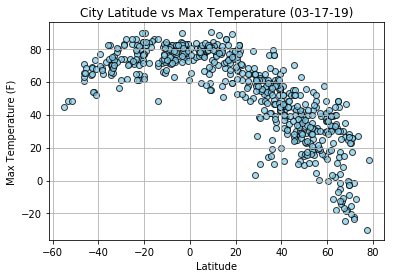

In [189]:
plt.scatter(lat, temp, marker="o", facecolors="skyblue", alpha=0.75, edgecolors="black",label="Temp")
#plt.axis([x_min,x_max,y_min,y_max])
import datetime
#today1=str(datetime.datetime.today()).split()[0]
today1=datetime.datetime.today().strftime('%m-%d-%y')
plt.grid(True)
plt.title(f"City Latitude vs Max Temperature ({today1})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

In [119]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,lat,Lng,Max Temp,Wind Speed
0,gucheng,0,CN,1552869913,81,32.27,111.65,43.03,2.66
1,bethel,1,US,1552866960,73,60.79,-161.76,30.20,8.05
2,souillac,75,FR,1552869370,86,45.60,-0.60,44.01,1.12
3,mataura,0,NZ,1552869171,67,-46.19,168.86,70.70,5.46
4,torbay,90,CA,1552869119,58,47.66,-52.73,28.00,27.51


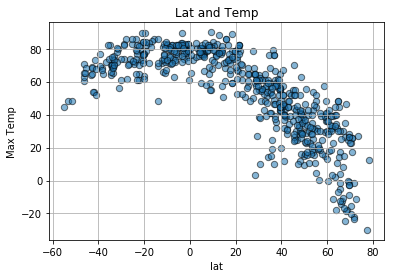

In [162]:

#plt.scatter(weather_data.lat,weather_data.a, s=120, c=red)

weather_data.plot(kind='scatter', x='lat', y='Max Temp', marker='o', s=40, facecolor='blue', alpha=.55, edgecolor="black",title="Lat and Temp")
plt.grid(True)
#plt.title("Lat and Temp")
#plt.xlabel("Latitude")
#plt.ylabel("Temperature F"
plt.show()

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities[0:10])

['nikolskoye', 'wanning', 'nizhneyansk', 'albany', 'mardan', 'tuggurt', 'rikitea', 'taolanaro', 'tommot', 'saint george']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

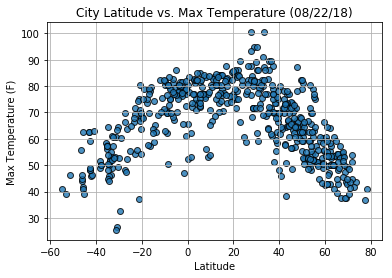

#### Latitude vs. Humidity Plot

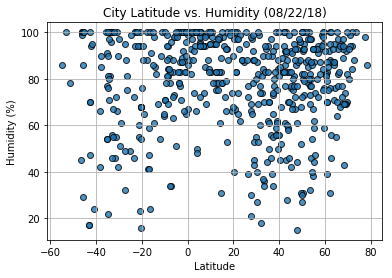

#### Latitude vs. Cloudiness Plot

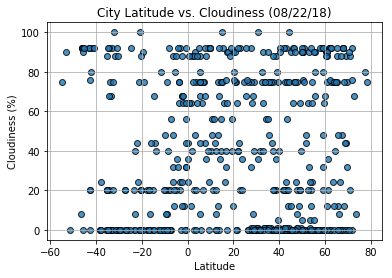

#### Latitude vs. Wind Speed Plot

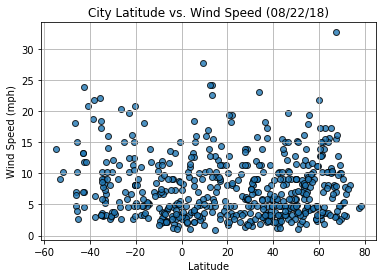